In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import os 
import numpy as np

In [2]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()


. Données

. Période, tendance

. Auto-corrélation

. Tendance

. Prédictions linéaires

. Machine learning

### Objectifs

### Buts principaux de l’étude d’un processus aléatoire à partir d’une série temporelle:
    
I. Décrire la série: valeurs manquantes? aberrantes? y a-t-il une
tendance générale? un effet saisonnier évident?

II.  résumer et/ou expliquer les variations: peut-on isoler
explicitement la tendance générale? la composante saisonnière?

III. prévoir les valeurs futures: quel sera la vitesse à tel moment par exemple , dans un an?
Pour les deux derniers objectifs, on peut lisser et/ou modéliser la
série.


### Definition
Une série temporelle {xt} 

I. c'est la réalisation d’un processus aléatoire

II. Indicé par le temps, noté {Xt}: pour chaque instant t, 

III. Xt est une variable aléatoire dont on a une réalisation {xt}.

### Attention: en général les Xt ne sont pas iid!

In [3]:


## Les trajets APR dans Paris 


import matplotlib.pyplot as plt 
%matplotlib inline 



names = ["col%i"%(i) for i in np.arange(8)]

Trajet_Speed_lisser_df = pd.read_csv("gabrawdata (2).csv", names = names)
Trajet_Speed_lisser_df.columns = ["dateentry" , "deviceid" , "latitude" , "longitude" , "altitude" , "bearing" , "speed" , "accuracy"]

Trajet_Speed_lisser_df.dateentry = pd.to_datetime(Trajet_Speed_lisser_df.dateentry)
Trajet_Speed_lisser_df = Trajet_Speed_lisser_df.iloc[0:800,]

Trajet_Speed_lisser_df.head()

,dateentry,deviceid,latitude,longitude,altitude,bearing,speed,accuracy
0,1970-01-01 00:25:17.828313422,123fe0be9804,48.898518,2.377969,0,0,0.0,18.065
1,1970-01-01 00:25:17.828318448,123fe0be9804,48.898518,2.377969,0,0,0.0,18.065
2,1970-01-01 00:25:17.828323487,123fe0be9804,48.898518,2.377969,0,0,0.0,18.065
3,1970-01-01 00:25:17.828328525,123fe0be9804,48.898518,2.377969,0,0,0.0,18.065
4,1970-01-01 00:25:17.828333555,123fe0be9804,48.898518,2.377969,0,0,0.0,18.065


In [4]:
Trajet_Speed_lisser_df.iloc[:, 0].value_counts()


1970-01-01 00:25:17.829482318    1
1970-01-01 00:25:17.829848445    1
1970-01-01 00:25:17.834253747    1
1970-01-01 00:25:17.829642761    1
1970-01-01 00:25:17.832253958    1
1970-01-01 00:25:17.834082821    1
1970-01-01 00:25:17.829190147    1
1970-01-01 00:25:17.833736706    1
1970-01-01 00:25:17.833144862    1
1970-01-01 00:25:17.833288218    1
1970-01-01 00:25:17.836221173    1
1970-01-01 00:25:17.834212906    1
1970-01-01 00:25:17.834271277    1
1970-01-01 00:25:17.833766732    1
1970-01-01 00:25:17.831930403    1
1970-01-01 00:25:17.829218850    1
1970-01-01 00:25:17.829524001    1
1970-01-01 00:25:17.829726752    1
1970-01-01 00:25:17.832308149    1
1970-01-01 00:25:17.836202553    1
1970-01-01 00:25:17.829343800    1
1970-01-01 00:25:17.836063286    1
1970-01-01 00:25:17.830314547    1
1970-01-01 00:25:17.829173810    1
1970-01-01 00:25:17.833447950    1
1970-01-01 00:25:17.829587572    1
1970-01-01 00:25:17.830730357    1
1970-01-01 00:25:17.832260215    1
1970-01-01 00:25:17.

## on enlève les doublons éventuelles 

In [6]:
Trajet_Speed_lisser_df = Trajet_Speed_lisser_df.drop_duplicates()

In [7]:
Trajet_Speed_lisser_df = Trajet_Speed_lisser_df.sort_values("dateentry")

## Jointure entre les données APR et les données open data ratp


In [8]:
bus = pd.read_csv("accessibilite-des-arrets-de-bus-ratp.csv", sep = ";" , header = 0 )
bus.columns = ['IDPTAR' , 'Nom Arrêt' , 'INSEE' , 'Departement' , 
               'X',  'Y' ,  'AccessUFR' , 'SonorePP', 
               'VisuellePP' ,'SonoreSP' , 
               'Visuelle SP' , 'Code Stif' , 'coord',
               'ID AMIVIF',  'PAQT',  'Téléphone' , 'Dateaccessibilité', 
               'QuaiTrain' , 'Sens' , 'Ligne']

station_bus_df = bus = bus[['Nom Arrêt' , 'Departement' , 'X' , 'Y',  'coord' ,'Sens' , 'Ligne' ]]


station_bus_df = station_bus_df.iloc[0:800,]



station_bus_df.head()


## détection de multimodalité avec jupyter , l'objectif est de reconnaitre avec précision les 


Position_bus1 = station_bus_df.iloc[:,4]
Position_bus2 = station_bus_df.iloc[:,0]

station_bus_df1 = pd.concat([Position_bus1 , Position_bus2] , axis = 1)


station_bus_df1.columns = ["LatitudeLongitude" , "Station"]

station_bus_df1.head()
bus_stop =  pd.DataFrame(station_bus_df1.LatitudeLongitude.str.split(' ',1).tolist(), 
                       columns = ['Latitude','Longitude'], index = station_bus_df.index)
bus_stop['Latitude'] = [x.replace("," , "") for x in bus_stop['Latitude']]

bus_stop['Station'] = station_bus_df1.Station
bus_stop['ligne'] = station_bus_df['Ligne']

bus_stop['Departement'] = station_bus_df['Departement']
bus_stop['Sens'] = station_bus_df['Sens']
bus_stop.head()





,Latitude,Longitude,Station,ligne,Departement,Sens
0,48.8929732362,2.34465558406,MAIRIE DU 18E - JULES JOFFRIN,8.0,75,R
1,48.8850140489,2.39652097146,BUTTE DU CHAPEAU ROUGE,3.0,75,R
2,48.8895673151,2.33882198677,LAMARCK - CAULAINCOURT,8.0,75,R
3,48.8635725023,2.40893329375,PORTE DE BAGNOLET,3.0,75,A
4,48.8768211421,2.40673066842,PORTE DES LILAS,3.0,75,R


In [9]:

station_bus_coord = {}

for data in bus_stop.iterrows():
    ligne = data[1]
    if ligne['Station'] not in  bus_stop['Station'].values :
        continue 
    else :
        station_bus_coord[ligne['Station']] = (float(ligne['Latitude']) ,float(ligne['Longitude']))
        
        
    

from geopy import distance


## Trajets proches des stations de bus à la main
## 1. Dans cette partie on récupère le dictionnaire précédent 

## 2. on exécute le premier tuple pour comparer et retourner ensuite la clé de la station la plus proche 
## 3. plus la valeur et la distance entre les points 
## le temps d'exécution ici me pose un vrai problème 
## il faut que je trouve le moyen d'améliorer mon code 
def trajet_proche(emplacement, emplacement_dict):
    """ on prend un tuple de latitude et de longitude et on le compare à un dictionnaire de lieux où clé = nom de station et valeur = (lat, long) 
    renvoie un tuple de (lieu le plus proche, distance) """
    trajet_proche = None
    for station_bus  in emplacement_dict.keys():
        dist = distance.distance(emplacement, emplacement_dict[station_bus]).meters
        if  trajet_proche is None:
            trajet_proche = (station_bus, dist)
        elif dist < trajet_proche[1]:
            trajet_proche = (station_bus, dist)
    return trajet_proche


In [10]:
Trajet_Speed_lisser_df['trajet_proche']= Trajet_Speed_lisser_df.apply(lambda x : trajet_proche((x['latitude'], x['longitude']), station_bus_coord),axis = 1) 
Trajet_Speed_lisser_df.head()


Trajet_Speed_lisser_df['Arret'] = [t[0] for t in Trajet_Speed_lisser_df.trajet_proche]

Trajet_Speed_lisser_df['distance_arret'] = [t[1] for t in Trajet_Speed_lisser_df.trajet_proche]
Trajet_Speed_lisser_df['distance_arret'] = [t[1] for t in Trajet_Speed_lisser_df.trajet_proche]







In [11]:

Trajet_Speed_lisser_df.head()

,dateentry,deviceid,latitude,longitude,altitude,bearing,speed,accuracy,trajet_proche,Arret,distance_arret
0,1970-01-01 00:25:17.828313422,123fe0be9804,48.898518,2.377969,0,0,0.0,18.065,"(CANAL SAINT DENIS, 187.05071764775275)",CANAL SAINT DENIS,187.050718
1,1970-01-01 00:25:17.828318448,123fe0be9804,48.898518,2.377969,0,0,0.0,18.065,"(CANAL SAINT DENIS, 187.05071764775275)",CANAL SAINT DENIS,187.050718
2,1970-01-01 00:25:17.828323487,123fe0be9804,48.898518,2.377969,0,0,0.0,18.065,"(CANAL SAINT DENIS, 187.05071764775275)",CANAL SAINT DENIS,187.050718
3,1970-01-01 00:25:17.828328525,123fe0be9804,48.898518,2.377969,0,0,0.0,18.065,"(CANAL SAINT DENIS, 187.05071764775275)",CANAL SAINT DENIS,187.050718
4,1970-01-01 00:25:17.828333555,123fe0be9804,48.898518,2.377969,0,0,0.0,18.065,"(CANAL SAINT DENIS, 187.05071764775275)",CANAL SAINT DENIS,187.050718


In [12]:

Trajet_Speed_lisser_df = Trajet_Speed_lisser_df[["altitude" , "speed", "distance_arret", "dateentry"]]







## Objectifs

### Buts principaux de l’étude d’un processus aléatoire à partir d’une série temporelle:

I. Décrire la série: valeurs manquantes? aberrantes? y a-t-il une tendance générale? un effet saisonnier évident?

II. résumer et/ou expliquer les variations: peut-on isoler explicitement la tendance générale? la composante saisonnière?

III. prévoir les valeurs futures: quel sera la vitesse à tel moment par exemple , dans un an? Pour les deux derniers objectifs, on peut lisser et/ou modéliser la série.

### Definition

Une série temporelle {xt}


I. c'est la réalisation d’un processus aléatoire

II. elle est indicée par le temps, noté {Xt}: pour chaque instant t,

III. Xt est une variable aléatoire dont on a une réalisation {xt}

Modélisation
Modèle déterministe: Xt = f (t, t ) où les erreurs du modèle t
sont va iid centrées. 


Exemples:
1. Modèle additif classique: Xt = Mt + St + t avec
    
I Mt tendance, fonction déterministe

II St saisonnalité, fonction déterministe


2. Modèle multiplicatif: Xt = Mt (1 + St )(1 + t )
    
    
    
Modèle stochastique: comme modèle déterministe mais les t ne
sont pas iid: t = g(Xt−1, Xt−2, ..., t−1, t−2, ...) avec {t} bruit
blanc (v.a. non corrélées centrées).


Exemple:
    
Xt = 1Xt−1 + 2Xt−2 + 1t−1 + t

Modèle ARMA(2,1), cas particulier d’un modèle SARIMA
Dans ces modèles on pourra ajouter des variables explicatives
exogènes: variables socio-économique, climatiques. . .

### Description

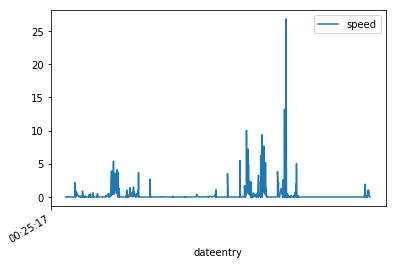

In [13]:
Trajet_Speed_lisser_df.plot(x = "dateentry" , y = "speed")

. Moyenne et variance ne sont pas constantes 

. Evolution generale la vitesse augmente au cours du temps correspondant à la colonne dateentry 



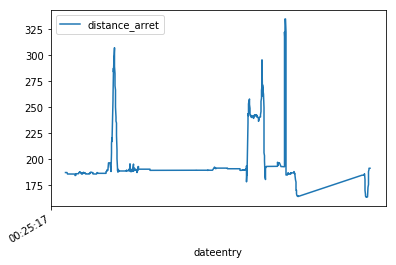

In [14]:
Trajet_Speed_lisser_df.plot(x = "dateentry" , y = "distance_arret")

. Moyenne et variance ne sont pas constantes 

. Evolution generale la vitesse augmente au cours du temps correspondant à la colonne dateentry 


### On enlève tout ce qui précède les périodes  ou  la série se comporte de façon différente

 ## Ici on a fait le choix de la date "1970-01-01 00:25:17.828428896" . 

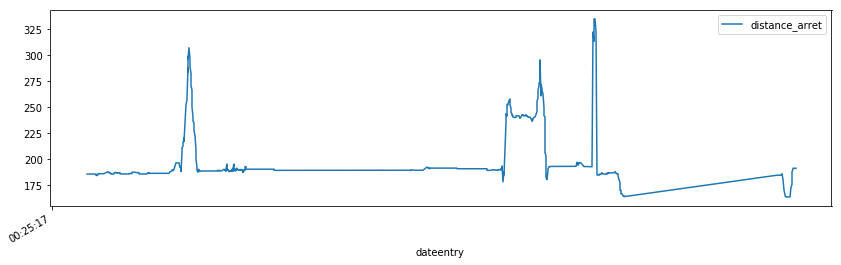

In [15]:
Trajet_Speed_lisser_df [Trajet_Speed_lisser_df.dateentry >= "1970-01-01 00:25:17.828447801"].plot(x="dateentry", y="distance_arret", figsize=(14,4))

### On peut étudier les corrélations entre les différentes dates. Le module le plus approprié est statsmodels.

In [16]:
data = Trajet_Speed_lisser_df[Trajet_Speed_lisser_df.dateentry > "1970-01-01 00:25:17.828447801"].copy()

data.head()

,altitude,speed,distance_arret,dateentry
20,0,0.0,185.597001,1970-01-01 00:25:17.828452818
21,0,0.0,185.597001,1970-01-01 00:25:17.828457843
22,0,0.0,185.597001,1970-01-01 00:25:17.828526396
23,0,0.0,185.597001,1970-01-01 00:25:17.828547050
24,0,0.0,185.597001,1970-01-01 00:25:17.828552080


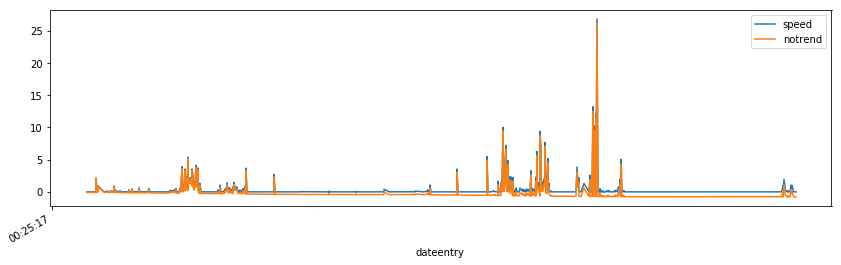

In [17]:
from statsmodels.tsa.tsatools import detrend
notrend = detrend(data.speed)
data["notrend"] = notrend
data.plot(x="dateentry", y=["speed", "notrend"], figsize=(14,4))

## On vérifie pour la période 




In [18]:
from statsmodels.tsa.stattools import acf
cor = acf(data.notrend)
cor 

array([ 1.        ,  0.1530124 ,  0.31159822,  0.2128089 ,  0.12794634,
        0.25891568,  0.26893075,  0.10605022,  0.28701298,  0.07733095,
        0.06384535,  0.06652177,  0.01966677,  0.05956126,  0.04122789,
        0.06492724,  0.06867806,  0.00138105,  0.00382894,  0.01285194,
       -0.02295302,  0.02541651,  0.01760266, -0.02194828,  0.00421881,
       -0.04182118, -0.05665893, -0.02736155, -0.05444854, -0.05924119,
       -0.05522342, -0.05671284, -0.04776611, -0.06870629, -0.07304925,
       -0.0740747 , -0.05774693, -0.05831659, -0.06744438, -0.06637838,
       -0.06750673])

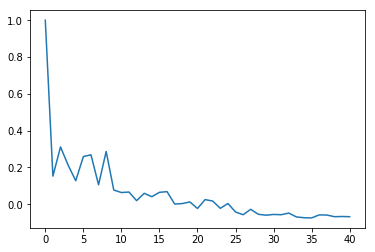

In [19]:
plt.plot(cor)

## Autocorrélation partielle 

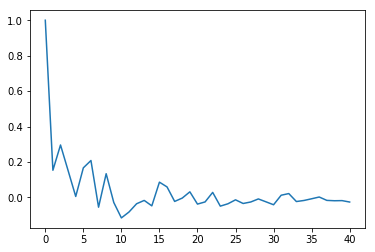

In [20]:
from statsmodels.tsa.stattools import pacf
pcor = pacf(data.notrend)
plt.plot(pcor)

## Tendance

### la fonction detrend retourne la tendance. On l’obtient en réalisant une régression linéaire de Y sur le temps t.

In [21]:
from statsmodels.api import OLS
import numpy
y = data.speed
X = numpy.ones((len(y), 2))
X[:,1] = numpy.arange(0,len(y))
reg = OLS(y,X)
results = reg.fit()
results.params

const    0.090036
x1       0.000910
dtype: float64

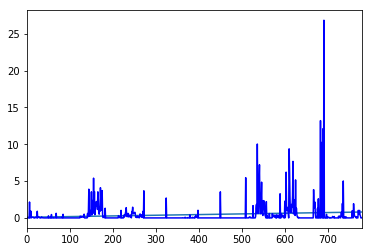

In [22]:
from statsmodels.graphics.regressionplots import abline_plot
fig = abline_plot(model_results=results)
ax = fig.axes[0]
ax.plot(X[:,1], y, 'b')
ax.margins(.1)


## Prédictions linéaires

### On sort ici du cadre linéaire pour utiliser le machine learning non linéaire pour faire de la prédiction. 
### Pour éviter les trop gros problèmes de tendance, on travaillera sur la série différenciée. 
### En théorie, il faudrait différencier jusqu’à ce qu’on enlève la tendance (voir ARIMA).

### On calcule la série différenciée. 
### Quelques astuces. pandas utilise les indices par défaut pour faire des opérations sur les colonnes. 
### C’est pourquoi il faut convertir les tableaux extraits du dataframe en numpy array.
### N’oubliez pas ce détail. Cela peut devenir très agaçant. On peut aussi utiliser la fonction diff.

In [23]:
data["diff"] = np.nan


data.iloc[1:, 5] = data.iloc[1:,1].as_matrix() - data.iloc[:len(data)-1 , 1].as_matrix()
pd.concat([data.head(n=5), data.tail(n=5)])

C:\Users\BADOHOUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


,altitude,speed,distance_arret,dateentry,notrend,diff
20,0,0.000000,185.597001,1970-01-01 00:25:17.828452818,-0.090036,NaN
21,0,0.000000,185.597001,1970-01-01 00:25:17.828457843,-0.090946,0.000000
22,0,0.000000,185.597001,1970-01-01 00:25:17.828526396,-0.091856,0.000000
23,0,0.000000,185.597001,1970-01-01 00:25:17.828547050,-0.092766,0.000000
24,0,0.000000,185.597001,1970-01-01 00:25:17.828552080,-0.093676,0.000000
795,0,0.387450,189.983761,1970-01-01 00:25:17.836191408,-0.407854,-0.630429
796,0,0.258323,191.169847,1970-01-01 00:25:17.836196158,-0.537891,-0.129127
797,0,0.000000,191.169847,1970-01-01 00:25:17.836202553,-0.797124,-0.258323
798,0,0.000000,191.169847,1970-01-01 00:25:17.836212349,-0.798034,0.000000
799,0,0.000000,191.169847,1970-01-01 00:25:17.836221173,-0.798944,0.000000


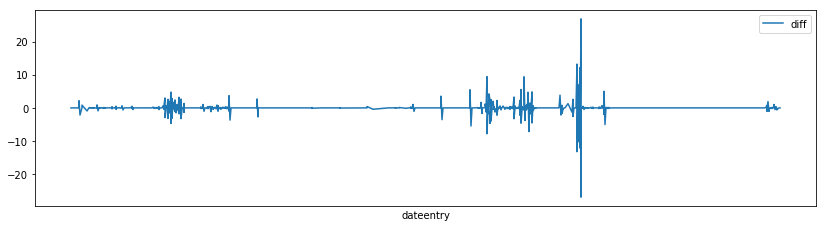

In [24]:
data.plot(x="dateentry", y="diff", figsize=(14,4))

### Sans information, la meilleure prédiction est la valeur de la veille (où celle dans le passé à l’horizon de prédiction considéré). 
### Dans notre cas, c’est simplement la variance de la série différenciée :

In [25]:
(data["diff"].apply(lambda x:x**2).sum()/len(data))**0.5

2.0398285247254737

In [26]:
from statsmodels.tsa.arima_model import ARMA
arma_mod = ARMA(data["diff"].dropna().as_matrix(), order=(8, 1))
res = arma_mod.fit()
res.params

C:\Users\BADOHOUN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


array([ 1.81035133e-04, -3.78444597e-01, -1.53408136e-01, -1.99527769e-01,
       -2.50223310e-01, -5.23335870e-02,  5.39693896e-02, -7.19102381e-02,
        1.14133414e-01, -5.29359300e-01])

## Machine learning

### On souhaite utiliser une random forest pour faire de la prédiction. On créé la matrice avec les séries décalées.

In [27]:
from statsmodels.tsa.tsatools import lagmat
lag = 8
X = lagmat(data["diff"], lag)
lagged = data.copy()
for c in range(1,lag+1):
    lagged["lag%d" % c] = X[:, c-1]
pd.concat([lagged.head(), lagged.tail()])

,altitude,speed,distance_arret,dateentry,notrend,diff,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8
20,0,0.000000,185.597001,1970-01-01 00:25:17.828452818,-0.090036,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
21,0,0.000000,185.597001,1970-01-01 00:25:17.828457843,-0.090946,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
22,0,0.000000,185.597001,1970-01-01 00:25:17.828526396,-0.091856,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
23,0,0.000000,185.597001,1970-01-01 00:25:17.828547050,-0.092766,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
24,0,0.000000,185.597001,1970-01-01 00:25:17.828552080,-0.093676,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000
795,0,0.387450,189.983761,1970-01-01 00:25:17.836191408,-0.407854,-0.630429,0.141238,0.376131,-0.527757,1.028267,0.000000,0.000000,-0.177481,0.177481
796,0,0.258323,191.169847,1970-01-01 00:25:17.836196158,-0.537891,-0.129127,-0.630429,0.141238,0.376131,-0.527757,1.028267,0.000000,0.000000,-0.177481
797,0,0.000000,191.169847,1970-01-01 00:25:17.836202553,-0.797124,-0.258323,-0.129127,-0.630429,0.141238,0.376131,-0.527757,1.028267,0.000000,0.000000
798,0,0.000000,191.169847,1970-01-01 00:25:17.836212349,-0.798034,0.000000,-0.258323,-0.129127,-0.630429,0.141238,0.376131,-0.527757,1.028267,0.000000
799,0,0.000000,191.169847,1970-01-01 00:25:17.836221173,-0.798944,0.000000,0.000000,-0.258323,-0.129127,-0.630429,0.141238,0.376131,-0.527757,1.028267


### On découpe en train/test de façon non aléatoire car c’est une série temporelle.

In [28]:
xc = ["lag%d" % i for i in range(1,lag+1)]
split = 0.66
isplit = int(len(lagged) * split)
xt = lagged[10:][xc]
yt = lagged[10:]["diff"]
X_train, y_train, X_test, y_test = xt[:isplit], yt[:isplit], xt[isplit:], yt[isplit:]

## On peut maintenant faire du machine learning sur la série décalé.

In [29]:
from sklearn.linear_model import LinearRegression
clr = LinearRegression()
clr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [30]:
import warnings 

In [31]:
warnings.simplefilter("ignore")
from sklearn.metrics import r2_score
r2 = r2_score(y_test.as_matrix(), clr.predict(X_test))
r2

0.4990713031916534

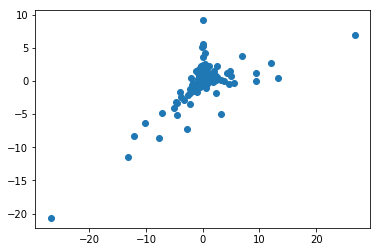

In [32]:
plt.scatter(y_test.as_matrix(), clr.predict(X_test))


## Non linéaire

In [33]:
from sklearn.ensemble import RandomForestRegressor
clrf = RandomForestRegressor()
clrf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [34]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test.as_matrix(), clrf.predict(X_test))
r2

0.21668189995058573

### C'est pas mieux .

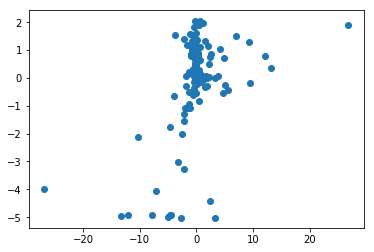

In [35]:
plt.scatter(y_test.as_matrix(), clrf.predict(X_test))

In [53]:
def multilevel_df_to_ndarray(df):
    shape = [-1] + [len(level) for level in df]
    return df.values.reshape(shape)


In [54]:
X_train_3D = multilevel_df_to_ndarray(X_train)

X_test_3D = multilevel_df_to_ndarray(X_test)

ValueError: cannot reshape array of size 4112 into shape (4,4,4,4,4,4,4,4)

In [73]:
train_data = trajet.iloc[0:100:,0:9]
test_data = trajet.iloc[110:180:,0:9]

data.columns =  ['Timestamp' , 'deviceid' , 'latitude' , 'longitude' , 'longitude' , 'altitude' , 'bearing' , 'speed' , 'accuracy']
data.head()

,Timestamp,deviceid,latitude,longitude,longitude,altitude,bearing,speed,accuracy
0,1543669130000,254a0530f70d7ece,48.843647,2.132580,176.159866,211.0,0.000000,0.000000,3.9
1,1543669131000,254a0530f70d7ece,48.843540,2.132480,176.929413,211.0,0.000000,0.000000,3.9
2,1543669132000,254a0530f70d7ece,48.843430,2.132379,177.684326,211.0,0.000000,0.000000,4.0
3,1543669133000,254a0530f70d7ece,48.843327,2.132282,178.471000,211.0,13.835481,0.000000,4.0
4,1543669134000,254a0530f70d7ece,48.843224,2.132182,179.314087,211.0,13.804829,16.158888,4.0


In [75]:
train_data.shape
test_data.shape

(70, 9)

In [80]:
sample = train_data.sample(n=100, random_state=412)
sample.columns

Index(['Colonne 2', 'Colonne 3', 'Colonne 4', 'Colonne 5', 'Colonne 6',
       'Colonne 7', 'Colonne 8', 'Colonne 9', 'Colonne 10'],
      dtype='object')

In [96]:
sample.head()

,Colonne 2,Colonne 3,Colonne 4,Colonne 5,Colonne 6,Colonne 7,Colonne 8,Colonne 9,Colonne 10
30,1543669160000,254a0530f70d7ece,48.841328,2.130600,197.615433,219.0,6.514991,-0.636957,4.000
91,1543669221000,254a0530f70d7ece,48.839966,2.126136,216.568069,287.0,0.486845,-2.564650,3.752
50,1543669180000,254a0530f70d7ece,48.839910,2.129534,210.526184,202.0,4.988322,-1.724225,5.680
13,1543669143000,254a0530f70d7ece,48.842224,2.131582,187.959930,197.0,12.371981,-0.522580,4.000
20,1543669150000,254a0530f70d7ece,48.841824,2.131239,191.857513,225.0,5.743599,-0.499329,3.900


In [106]:
type(str(sample['Colonne 2'].values))

str

In [107]:

([dt.strptime(x,'%Y-%m-%d %H:%M:%S').hour for x in str(sample['Colonne 2'].values)] )

ValueError: time data '[' does not match format '%Y-%m-%d %H:%M:%S'

In [94]:
sample['Colonne 2'] = "-".join(sample['Colonne 2'])

TypeError: sequence item 0: expected str instance, int found

In [90]:
([dt.strptime(x,'%Y-%m-%d %H:%M:%S').hour for x in sample['Colonne 2'].values] )

TypeError: strptime() argument 1 must be str, not numpy.int64

In [84]:
from datetime import datetime as dt

In [87]:
sample = train_data.sample(n=100, random_state=412)

pickup_hour = np.array([dt.strptime(x, '%Y-%m-%d %H:%M:%S').hour for x in sample['Colonne 2'].values])

#There is no native "jitter" option in matplotlib, so we make our own
def add_jitter(arr):
    return arr + (np.random.random(len(arr))-0.5)*arr.std()*0.1

TypeError: strptime() argument 1 must be str, not numpy.int64